## **Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

## **Baca Dataset dan Preprocessing**

In [ ]:
# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/salmaznn/Machine-Learning/refs/heads/main/01.%20Week%201/Task%202/HeartDisease.csv")

# Ubah target ke biner: 0 (sehat), 1 (sakit)
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
df = df.drop(columns='num')

# Hilangkan baris dengan nilai kosong
df = df.dropna()

# Pisah fitur dan target
X = df.drop(columns='target')
y = df['target']

# Normalisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## **Model Bagging: Random Forest**

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:, 1]

## **Model Boosting: XGBoost**

In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:45:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## **Evaluasi Metrik**

In [ ]:
def evaluate_model(y_true, y_pred, y_prob):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred),
        'AUC': roc_auc_score(y_true, y_prob)
    }

rf_metrics = evaluate_model(y_test, rf_preds, rf_probs)
xgb_metrics = evaluate_model(y_test, xgb_preds, xgb_probs)

## **ROC Curve**

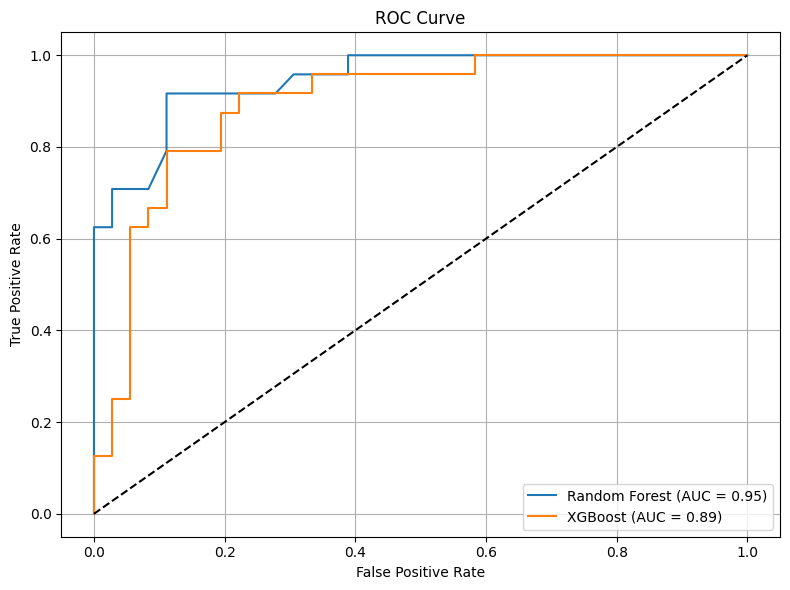

In [ ]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(rf_metrics['AUC']))
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = {:.2f})'.format(xgb_metrics['AUC']))
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## **Tampilkan Hasil Evaluasi**

In [ ]:
print("=== Evaluasi Random Forest (Bagging) ===")
for k, v in rf_metrics.items():
    print(f"{k}: {v:.4f}")

print("\n=== Evaluasi XGBoost (Boosting) ===")
for k, v in xgb_metrics.items():
    print(f"{k}: {v:.4f}")

=== Evaluasi Random Forest (Bagging) ===
Accuracy: 0.8833
Precision: 0.8400
Recall: 0.8750
F1-Score: 0.8571
AUC: 0.9473

=== Evaluasi XGBoost (Boosting) ===
Accuracy: 0.8333
Precision: 0.7500
Recall: 0.8750
F1-Score: 0.8077
AUC: 0.8947


# **Persamaan Matematika**

### **1. Accuracy**
Accuracy mengukur proporsi jumlah prediksi yang benar dibandingkan total data.  
Persamaan matematikanya adalah:

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

Di mana:
- \( TP \) = True Positive  
- \( TN \) = True Negative  
- \( FP \) = False Positive  
- \( FN \) = False Negative

---

### **2. Precision**
Precision mengukur ketepatan model dalam memprediksi kelas positif.  
Persamaan matematikanya adalah:

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

---

### **3. Recall (Sensitivity)**
Recall mengukur seberapa banyak dari total positif yang berhasil diprediksi dengan benar.  
Persamaan matematikanya adalah:

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

---

### **4. F1-Score**
F1-Score adalah rata-rata harmonik dari Precision dan Recall, cocok saat data tidak seimbang.  
Persamaan matematikanya adalah:

$$
\text{F1-Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

---

### **5. AUC - Area Under Curve**
AUC mengukur luas di bawah kurva ROC. Nilai AUC mendekati 1 menunjukkan performa yang sangat baik.  

$$
\text{AUC} = \int_{0}^{1} \text{TPR}(x)\,dx
$$

Dengan definisi:
- $$\text{TPR} = \frac{TP}{TP + FN} $$

- $$\text{FPR} = \frac{FP}{FP + TN} $$